# Setup

In [1]:
from piper import piper
from piper.verbs import *
from piper.defaults import *

piper version 0.0.7, last run: Friday, 26 February 2021 15:11:08


# Data import

In [2]:
df = pd.read_excel('inputs/Online_store_sales.xlsx', sheet_name='Online_Retail')

head(df, 10)

46431 rows, 9 columns


,InvoiceNo,ProductCategory,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,Appliances,22728,ALARM CLOCK BAKELIKE PINK,24,2010-01-12 08:45:00,3.75,12583.0,France
1,536370,Appliances,22727,ALARM CLOCK BAKELIKE RED,24,2010-01-12 08:45:00,3.75,12583.0,France
2,536370,Appliances,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-01-12 08:45:00,3.75,12583.0,FRANCE
3,536370,Appliances,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-01-12 08:45:00,0.85,12583.0,France
4,536370,Appliances,21883,STARS GIFT TAPE,24,2010-01-12 08:45:00,0.65,12583.0,France
5,536370,Appliances,10002,INFLATABLE POLITICAL GLOBE,48,2010-01-12 08:45:00,0.85,12583.0,France
6,536370,Appliances,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-01-12 08:45:00,1.25,12583.0,France
7,536370,Appliances,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-01-12 08:45:00,2.95,12583.0,france
8,536370,Appliances,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-01-12 08:45:00,2.95,12583.0,France
9,536370,Appliances,22629,SPACEBOY LUNCH BOX,24,2010-01-12 08:45:00,1.95,12583.0,France


## meta data / overview

In [3]:
info(df)

Dataframe with (rows, cols) (46431, 9) consumes 15.48 Mb


,columns,data_type,unique,isna,isnull,total_count
0,InvoiceNo,int64,2406,0,0,46431
1,ProductCategory,object,4,0,0,46431
2,StockCode,object,2807,0,0,46431
3,Description,object,2916,0,0,46431
4,Quantity,int64,148,0,0,46431
5,InvoiceDate,object,2372,0,0,46431
6,UnitPrice,float64,206,0,0,46431
7,CustomerID,float64,422,1480,1480,46431
8,Country,object,38,0,0,46431


## Re-sequence columns

In [4]:
cols = ['InvoiceDate', 'InvoiceNo', 'Country', 'CustomerID', 'ProductCategory',
        'StockCode', 'Description', 'Quantity', 'UnitPrice']
df = df[cols]
head(df, 10)

46431 rows, 9 columns


,InvoiceDate,InvoiceNo,Country,CustomerID,ProductCategory,StockCode,Description,Quantity,UnitPrice
0,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22728,ALARM CLOCK BAKELIKE PINK,24,3.75
1,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22727,ALARM CLOCK BAKELIKE RED,24,3.75
2,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22726,ALARM CLOCK BAKELIKE GREEN,12,3.75
3,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21724,PANDA AND BUNNIES STICKER SHEET,12,0.85
4,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21883,STARS GIFT TAPE,24,0.65
5,2010-01-12 08:45:00,536370,France,12583.0,Appliances,10002,INFLATABLE POLITICAL GLOBE,48,0.85
6,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21791,VINTAGE HEADS AND TAILS CARD GAME,24,1.25
7,2010-01-12 08:45:00,536370,france,12583.0,Appliances,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2.95
8,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2.95
9,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22629,SPACEBOY LUNCH BOX,24,1.95


## Calculate SalesValue

In [5]:
%%piper

df <- df >> assign(SalesValue=lambda x: x.Quantity * x.UnitPrice,
                  Description=lambda x: x.Description.str.title())
>> order_by(['InvoiceDate', 'InvoiceNo', 'Country', 'CustomerID', 'ProductCategory', 'StockCode'])

In [6]:
head(df, 10)

46431 rows, 10 columns


,InvoiceDate,InvoiceNo,Country,CustomerID,ProductCategory,StockCode,Description,Quantity,UnitPrice,SalesValue
11,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22631,Circus Parade Lunch Box,24,1.95,46.8
2,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22726,Alarm Clock Bakelike Green,12,3.75,45.0
5,2010-01-12 08:45:00,536370,France,12583.0,Appliances,10002,Inflatable Political Globe,48,0.85,40.8
3,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21724,Panda And Bunnies Sticker Sheet,12,0.85,10.2
13,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21731,Red Toadstool Led Night Light,24,1.65,39.6
6,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21791,Vintage Heads And Tails Card Game,24,1.25,30.0
4,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21883,Stars Gift Tape,24,0.65,15.6
15,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21913,Vintage Seaside Jigsaw Puzzles,12,3.75,45.0
8,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22326,Round Snack Boxes Set Of4 Woodland,24,2.95,70.8
18,2010-01-12 08:45:00,536370,France,12583.0,Appliances,22492,Mini Paint Set Vintage,36,0.65,23.4


# Analysis/Cleanup

## Duplicate data/rows

In [7]:
head(df)

46431 rows, 10 columns


,InvoiceDate,InvoiceNo,Country,CustomerID,ProductCategory,StockCode,Description,Quantity,UnitPrice,SalesValue
11,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22631,Circus Parade Lunch Box,24,1.95,46.8
2,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22726,Alarm Clock Bakelike Green,12,3.75,45.0
5,2010-01-12 08:45:00,536370,France,12583.0,Appliances,10002,Inflatable Political Globe,48,0.85,40.8
3,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21724,Panda And Bunnies Sticker Sheet,12,0.85,10.2


In [8]:
%%piper 
duplicated(df, unique_only=False)
>> where("duplicate == False")
>> head()

46253 rows, 11 columns


,duplicate,InvoiceDate,InvoiceNo,Country,CustomerID,ProductCategory,StockCode,Description,Quantity,UnitPrice,SalesValue
11,False,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22631,Circus Parade Lunch Box,24,1.95,46.8
2,False,2010-01-12 08:45:00,536370,FRANCE,12583.0,Appliances,22726,Alarm Clock Bakelike Green,12,3.75,45.0
5,False,2010-01-12 08:45:00,536370,France,12583.0,Appliances,10002,Inflatable Political Globe,48,0.85,40.8
3,False,2010-01-12 08:45:00,536370,France,12583.0,Appliances,21724,Panda And Bunnies Sticker Sheet,12,0.85,10.2


## Quick check no unit price variances found

In [9]:
%%piper
df 
>> clean_columns()
>> trim()
>> group_by(['stockcode', 'description'])
>> summarise(unit_max=('unitprice', 'min'), unit_min=('unitprice', 'min'))
>> assign(variance=lambda x: x.unit_max - x.unit_min)
>> pd.DataFrame.reset_index()
>> assign(description=lambda x: x.description.str.title())
>> head(5)

2921 rows, 5 columns


,stockcode,description,unit_max,unit_min,variance
0,10002,Inflatable Political Globe,0.85,0.85,0.0
1,10120,Doggy Rubber,0.21,0.21,0.0
2,10125,Mini Funky Design Tapes,0.42,0.42,0.0
3,10133,Colouring Pencils Brown Tube,0.42,0.42,0.0
4,10135,Colouring Pencils Brown Tube,0.42,0.42,0.0


## Stockcodes linked to more than one ProductCategory

In [10]:
%%piper
df 
>> trim()
>> counts(['StockCode', 'ProductCategory'], sort_values=None)
>> distinct()
>> pd.DataFrame.reset_index()
>> counts(['StockCode', 'ProductCategory'], sort_values=None)
>> pd.DataFrame.reset_index()
>> duplicated(['StockCode'])
>> select('-duplicate')
>> pd.DataFrame.reset_index(drop=True)

,StockCode,ProductCategory,n
0,10002,Appliances,1
1,10120,Apperals,1
2,10125,Apperals,1
3,10125,Appliances,1
4,10133,Appliances,1
...,...,...,...
69,23245,Cosmetics,1
70,POST,Appliances,1
71,POST,Cosmetics,1
72,POST,Apperals,1


## ProductCategory

In [11]:
count(df, 'ProductCategory')

,ProductCategory,n
0,Apperals,11648
1,Cosmetics,11607
2,Appliances,11607
3,House_holds,11569


In [12]:
df.loc[df.ProductCategory == 'House_holds', 'ProductCategory'] = 'Households'
df.loc[df.ProductCategory == 'Apperals', 'ProductCategory'] = 'Apparels'

In [13]:
count(df, 'ProductCategory')

,ProductCategory,n
0,Apparels,11648
1,Cosmetics,11607
2,Appliances,11607
3,Households,11569


## Country

In [14]:
%piper counts(df, 'Country', cum_percent=True, threshold=81) >> adorn(columns='n')

,n,cum %
Germany,9495,20.45
France,8554,38.87
EIRE,8196,56.52
Spain,2533,61.98
Netherlands,2371,67.09
Belgium,2069,71.54
Switzerland,2002,75.85
Portugal,1519,79.13
All,36739,NaN


In [15]:
df.Country = df.Country.str.title()

In [16]:
%piper df >> count('Country') >> head(5)

36 rows, 2 columns


,Country,n
0,Germany,9495
1,France,8557
2,Eire,8196
3,Spain,2533
4,Netherlands,2371


## StockCode

In [17]:
%piper count(df, 'StockCode') >> head(5)

2807 rows, 2 columns


,StockCode,n
0,POST,1112
1,22423,341
2,22326,317
3,22554,225
4,22556,210


## InvoiceNo

In [18]:
%piper df >> count('InvoiceNo') >> head()

2406 rows, 2 columns


,InvoiceNo,n
0,570672,259
1,562046,219
2,569866,182
3,563613,171


## InvoiceDate

In [19]:
count(df, 'InvoiceDate')

,InvoiceDate,n
0,2011-11-10 14:52:00,259
1,2011-02-08 10:34:00,219
2,2011-06-10 14:50:00,182
3,18-08-2011 08:49,171
4,2011-07-01 12:28:00,149
...,...,...
2367,18-04-2011 10:28,1
2368,2011-09-06 09:44:00,1
2369,16-12-2010 10:38,1
2370,2011-10-11 13:48:00,1


In [20]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [21]:
count(df, 'InvoiceDate')

,InvoiceDate,n
0,2011-11-10 14:52:00,259
1,2011-02-08 10:34:00,219
2,2011-06-10 14:50:00,182
3,2011-08-18 08:49:00,171
4,2011-07-01 12:28:00,149
...,...,...
2367,2011-10-14 11:44:00,1
2368,2011-05-23 14:50:00,1
2369,2011-08-23 09:36:00,1
2370,2010-05-12 12:02:00,1


## CustomerID

In [22]:
count(df, 'CustomerID')

,CustomerID,n
0,14911.0,5903
1,14646.0,2085
2,NaN,1480
3,14156.0,1420
4,12415.0,778
...,...,...
418,12791.0,2
419,12814.0,2
420,12505.0,1
421,17443.0,1


In [23]:
df.CustomerID = df.CustomerID.fillna(0).astype(int)
count(df, 'CustomerID')

,CustomerID,n
0,14911,5903
1,14646,2085
2,0,1480
3,14156,1420
4,12415,778
...,...,...
418,12666,2
419,12814,2
420,17443,1
421,12505,1


## Quantity

In [24]:
count(df, 'Quantity')

,Quantity,n
0,12,10628
1,6,5672
2,24,4162
3,4,3613
4,2,3356
...,...,...
143,-250,1
144,23,1
145,407,1
146,38,1


### Negative Quantity

In [25]:
%%piper
df >> where("Quantity < 0") >> head(10)

1432 rows, 10 columns


,InvoiceDate,InvoiceNo,Country,CustomerID,ProductCategory,StockCode,Description,Quantity,UnitPrice,SalesValue
147,2010-01-12 14:33:00,536548,Germany,12472,Appliances,20914,Set/5 Red Retrospot Lid Glass Bowls,-1,2.95,-2.95
157,2010-01-12 14:33:00,536548,Germany,12472,Appliances,20957,Porcelain Hanging Bell Small,-1,1.45,-1.45
156,2010-01-12 14:33:00,536548,Germany,12472,Appliances,21218,Red Spotty Biscuit Tin,-3,3.75,-11.25
153,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22077,6 Ribbons Rustic Charm,-6,1.65,-9.90
155,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22168,Organiser Wood Antique White,-2,8.50,-17.00
146,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22242,5 Hook Hanger Magic Toadstool,-5,1.65,-8.25
145,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22244,3 Hook Hanger Magic Garden,-4,1.95,-7.80
152,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22245,"Hook, 1 Hanger ,Magic Garden",-2,0.85,-1.70
151,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22333,Retrospot Party Bag + Sticker Set,-1,1.65,-1.65
158,2010-01-12 14:33:00,536548,Germany,12472,Appliances,22580,Advent Calendar Gingham Sack,-4,5.95,-23.80


## Export of cleaned dataframe

In [26]:
%%piper 
df >> to_excel(file_name='outputs/testing')

Workbook: outputs/20210226_testing.xlsx
<< mult-sheet mode >>
Sheet (range): sheet1 ($A$1:$J$46432)
Completed.


# Questions

## Duplicate CustomerIDs ? Not unique across Countries

In [27]:
%%piper
df 
>> distinct(['Country', 'CustomerID'])
>> group_by(['CustomerID','Country']) 
>> summarise(n=('InvoiceNo', 'count'))
>> pd.DataFrame.reset_index()
>> duplicated('CustomerID', )
>> select('-duplicate')

,CustomerID,Country,n
0,0,Bahrain,1
1,0,Eire,1
2,0,France,1
3,0,Hong Kong,1
4,0,Israel,1
...,...,...,...
433,17444,Canada,1
434,17508,Greece,1
435,17828,Malta,1
436,17829,United Arab Emirates,1


## How many invoices per country?

In [28]:
%%piper
gx <- df 
>> distinct(['Country', 'InvoiceNo', 'ProductCategory'])
>> group_by(['Country', 'ProductCategory']) 
>> summarise(count_of_invoices=('InvoiceNo', 'count'))
>> order_by('count_of_invoices', ascending=False)
>> pd.DataFrame.reset_index()

In [29]:
head(gx,10)

115 rows, 3 columns


,Country,ProductCategory,count_of_invoices
0,Germany,Appliances,162
1,Germany,Apparels,159
2,Germany,Households,152
3,Germany,Cosmetics,130
4,France,Appliances,125
5,France,Apparels,124
6,France,Households,114
7,France,Cosmetics,98
8,Eire,Cosmetics,96
9,Eire,Households,95


In [30]:
%piper gx >> where("count_of_invoices > 100") >> head()

7 rows, 3 columns


,Country,ProductCategory,count_of_invoices
0,Germany,Appliances,162
1,Germany,Apparels,159
2,Germany,Households,152
3,Germany,Cosmetics,130


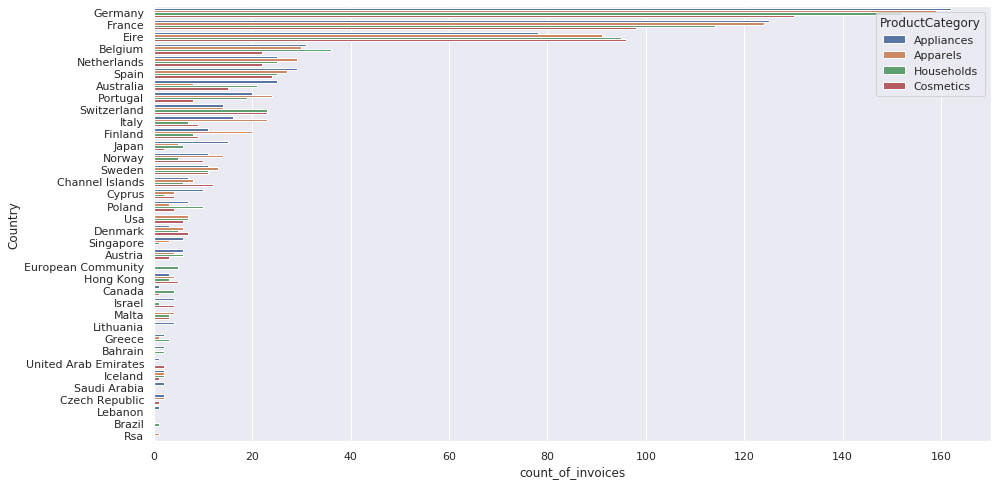

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=gx, y='Country', x='count_of_invoices', hue='ProductCategory')

## Quantity vs UnitPrice

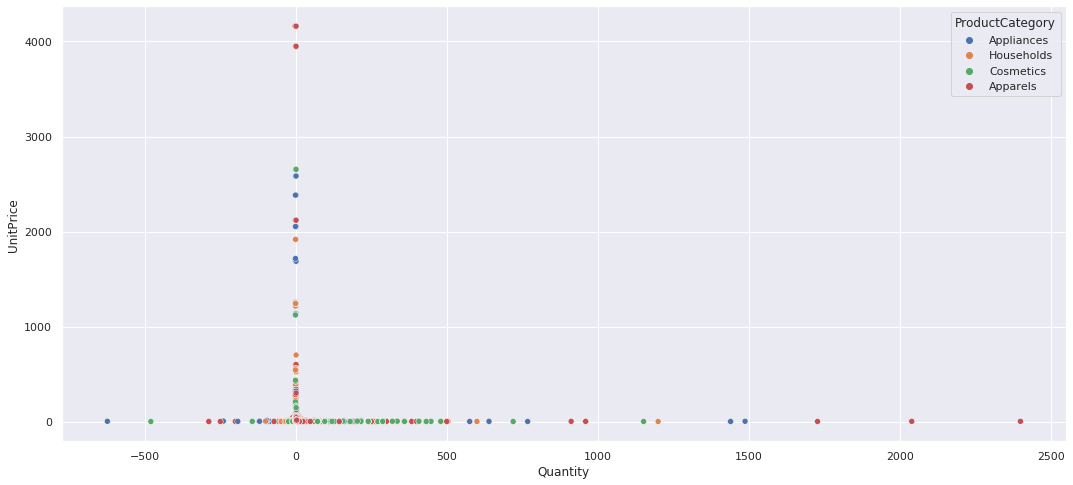

In [32]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.scatterplot(data=df, x='Quantity', y='UnitPrice', hue='ProductCategory')

## Sales by Invoice Date

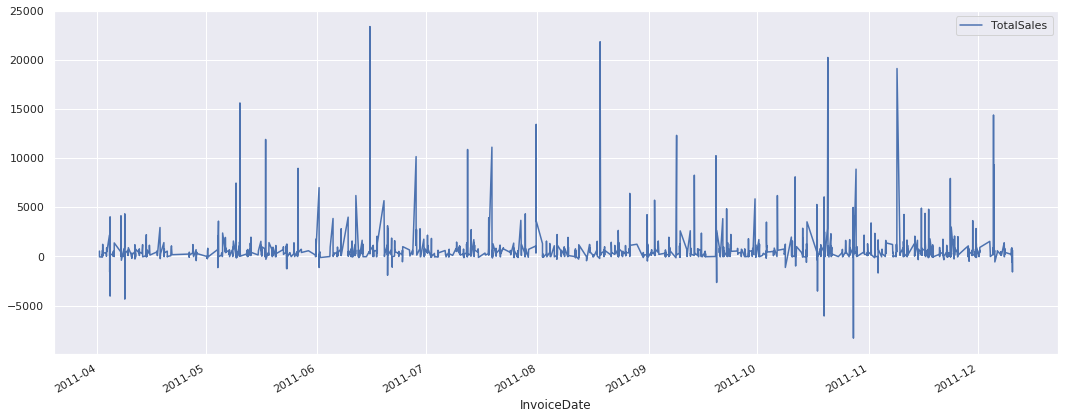

In [33]:
%%piper 
df 
>> group_by(['InvoiceDate'])
>> summarise(TotalSales=('SalesValue', 'sum'))
>> where("InvoiceDate > '2011-04-01'").plot(figsize=(18,7))

## Sales by Country, ProductCategory, Invoice Date

In [34]:
%%piper 

gx <- df 
>> group_by(['Country', 'ProductCategory', 'InvoiceDate']) 
>> summarise(TotalSales=('SalesValue', 'sum'))
>> where("InvoiceDate >= '2011-11' 
         and TotalSales.between(0, 100)")
>> pd.DataFrame.reset_index()
>> assign(TotalSales=lambda x: x.TotalSales.round(2))

In [35]:
head(gx, 6)

22 rows, 4 columns


,Country,ProductCategory,InvoiceDate,TotalSales
0,Eire,Apparels,2011-11-13 13:05:00,31.60
1,Eire,Apparels,2011-11-21 09:21:00,95.40
2,Eire,Apparels,2011-12-10 10:04:00,25.50
3,Finland,Apparels,2011-11-17 14:51:00,69.61
4,France,Apparels,2011-11-16 11:52:00,77.76
5,France,Apparels,2011-11-23 14:01:00,19.26


In [36]:
%%piper 

gx <- df 
>> group_by(['Country', 'ProductCategory', 'InvoiceDate']) 
>> summarise(TotalSales=('SalesValue', 'mean'))
>> where("InvoiceDate >= '2011-11' 
#          and TotalSales.between(0, 100)
         ")
>> pd.DataFrame.reset_index()
>> assign(TotalSales=lambda x: x.TotalSales.round(2))

In [37]:
head(gx, 6)

381 rows, 4 columns


,Country,ProductCategory,InvoiceDate,TotalSales
0,Australia,Apparels,2011-11-15 10:32:00,189.45
1,Australia,Apparels,2011-11-15 14:22:00,429.60
2,Australia,Apparels,2011-11-24 12:30:00,35.80
3,Australia,Appliances,2011-11-01 09:47:00,24.34
4,Australia,Cosmetics,2011-12-08 14:19:00,60.88
5,Australia,Households,2011-12-05 12:34:00,20.66


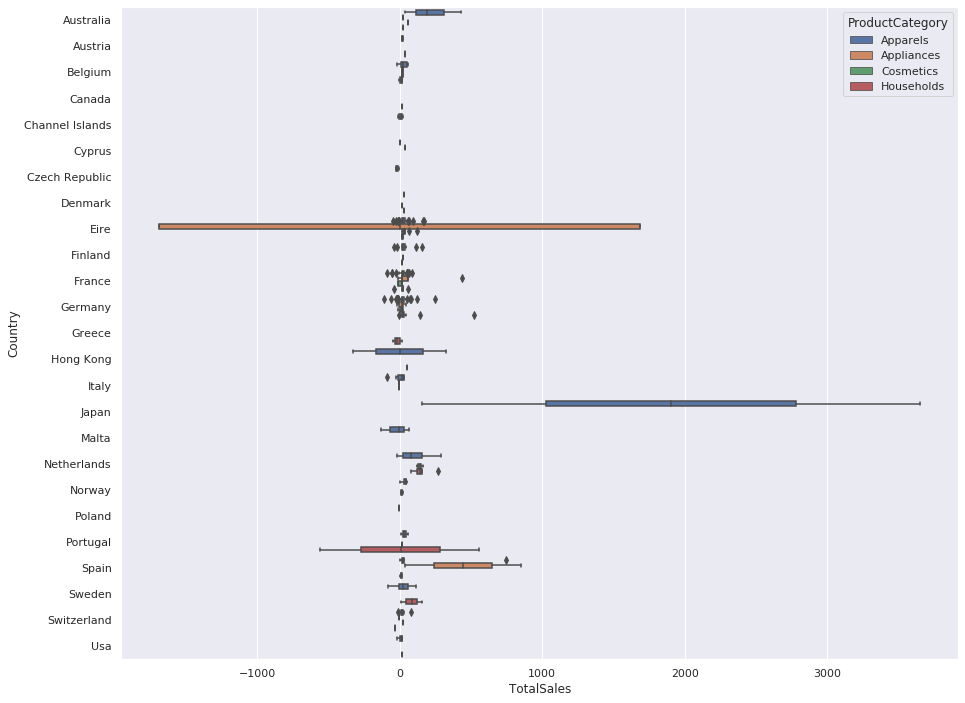

In [38]:
fig, ax = plt.subplots(figsize=(15,12))
sns.boxplot(data=gx, y='Country', x='TotalSales', hue='ProductCategory')